I am building a model using KNN to classify patients as either diabetic (1) or non-diabetic (0). I chose this problem because diabetes is such a widespread and serious condition, and being able to detect it early can really make a difference in people's lives. Also, this idea is clearly a classification problem since we are dealing with two distinct categories—diabetic and non-diabetic. The goal is to assign patients to one of these groups(classes) based on various health metrics.

I loaded a dataset from **kaggle** `daibetes.csv` which contains all the data i need to build my model

I am working on this task as part of **THE T IN STEM workshop - Intermediate Track (Machine Learning)** by the `CodeWithSarah` community. Big thanks to `Sarah El Rashidi` for this opportunity.

lets start first by importing the libraries we need for this task

In [307]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier

lets first start first by loading and reading our data set

In [308]:
data_set=pd.read_csv('diabetes.csv')
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


lets start by checking for missing values and duplicates before we start visualising our data and checking there correlation

In [309]:
data_set.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

looks like we have no missing values which is great.

In [310]:
data_set.duplicated().sum()

0

looks like there no duplicates as well and from the table above we can also see that all our data are numerical and there are no extreme values to standarize so we can go straight to visualization

lets start by checking the correlation matrix also we can do that using a heatmap

<Axes: >

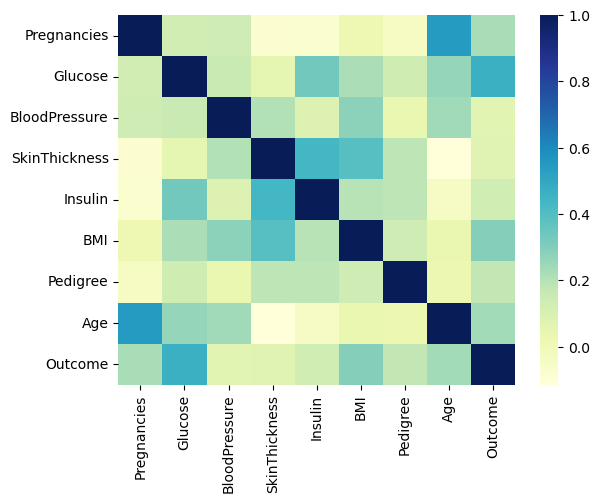

In [311]:
sns.heatmap(data_set.corr(),cmap='YlGnBu')

In [312]:
corr_matrix=data_set.corr()#correlation matrix
display(corr_matrix['Outcome'].sort_values(ascending=False))


Outcome          1.000000
Glucose          0.466581
BMI              0.292695
Age              0.238356
Pregnancies      0.221898
Pedigree         0.173844
Insulin          0.130548
SkinThickness    0.074752
BloodPressure    0.065068
Name: Outcome, dtype: float64

we can see that Glucose ,BMI ,and Age have the highest corr that does not mean we should drop the rest since they might have significane in combination with other features so we can train our model with and then without and check which yielded better results in the accuracy-score test 

lets start first with splitting our data set into training data and testing data

In [313]:
X = data_set.drop('Outcome', axis=1)
y = data_set['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=42)

In [314]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


lets start building the model using our training data

In [315]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

now our model is trained using our training data all thats left is to test its accuracy

In [316]:
y_pred = model.predict(X_test) # predicted the output

In [317]:
display(y_pred)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [318]:
accuracy_score(y_test,y_pred)

0.6623376623376623

the accuracy of our model is decent at 66%

after some research by dropping some columns the accuracy rate increased to 76.4%

In [319]:
data_set=data_set.drop(['BloodPressure','SkinThickness','Insulin','Pedigree'],axis=1)

lets split our new dataset into a training set and a testing set

In [320]:
X2 = data_set.drop('Outcome', axis=1)
y2 = data_set['Outcome']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,train_size=0.8, random_state=42)

In [321]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(614, 4)
(154, 4)
(614,)
(154,)


In [322]:
model.fit(X2_train, y2_train)

KNeighborsClassifier()

In [323]:
y_pred2 = model.predict(X2_test) # predicted the output

In [324]:
display(y_pred2)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [325]:
accuracy_score(y2_test,y_pred2)

0.7662337662337663

we can see that the accuracy rate after dropping the `columns :` **BloodPressure, SkinThickness, Insulin, and Pedigree** increased to 76% which is a much plusable accuracy rate than 66% we can further increase the accuracy of our model by further training it increasing the size of our data set for more training data

In [326]:
KNeighborsClassifier_prediction = pd.DataFrame({
    "Prediction": y_pred2
})

KNeighborsClassifier_prediction.to_csv("prediction_KNeigbors_Classifier.csv", index=False)